In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
# csv 파일 Load
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/AppleStore.csv')
df2 = pd.read_csv('/content/gdrive/My Drive/appleStore_description.csv')

In [4]:
define_testsize = 0.1

In [5]:
newDf = pd.merge(df,df2)

In [6]:
newDf

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Place the falling blocks correctly in order to...
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,A thrilling virtual reality roller coaster exp...
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,"Rock star Bret Michaels, winner of Celebrity A..."
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1,VR Roller Coaster World is an app for Google C...


In [7]:
df_x = newDf[['app_desc']]
df_x

,app_desc
0,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,Let Evernote change the way you organize your ...
2,Download the most popular free weather app pow...
3,The eBay app is the best way to find anything ...
4,On more than 250 million devices around the wo...
...,...
7192,Place the falling blocks correctly in order to...
7193,A thrilling virtual reality roller coaster exp...
7194,"Rock star Bret Michaels, winner of Celebrity A..."
7195,VR Roller Coaster World is an app for Google C...


In [8]:
df_x['app_desc'][0]

'SAVE 20%, now only $3.99 for a limited time!\n\nOne of the most popular video games in arcade history!\n2015 World Video Game Hall of Fame Inductee\n\nWho can forget the countless hours and quarters spent outrunning pesky ghosts and chompin’ on dots? Now you can have the same arcade excitement on your mobile devices! \nGuide PAC-MAN through the mazes with easy swipe controls, a MFi controller, or kick it old school with the onscreen joystick!\nEat all of the dots to advance to the next stage. Go for high scores and higher levels! Gain an extra life at 10.000 points! Gobble Power Pellets to weaken ghosts temporarily and eat them up before they change back. Avoid Blinky, the leader of the ghosts, and his fellow ghosts Pinky, Inky, and Clyde, or you will lose a life. It’s game over when you lose all your lives.\n\n9 NEW MAZES Included!!!\nThe game includes 9 new mazes in addition to the pixel for pixel recreation of the classic original maze. Challenge your skill to beat them all! We are

In [9]:
def DevideRating2(x):
    x2 = (int)(x*2);
    if(x >= 8):
        return 1
    else:
        return 0

def DevideRating5(x):
    if (int)(x) == 5  :
      return 4
    return (int)(x) 
    
def DevideRating11(x):
    return (int)(x*2)

df_y = newDf[['user_rating']]
df_y['user_rating'] = df_y['user_rating'].apply(DevideRating5)
df_y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_rating
0,4
1,4
2,3
3,4
4,4
...,...
7192,4
7193,4
7194,4
7195,4


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df_x, df_y, test_size = define_testsize, random_state = 1)

In [11]:
x_train

,app_desc
4158,ようこそ、青藍高校リア充部へ\nリア充部は非リアの生徒だけが入部を許された、リア充になる事を...
1941,This is a stereogram application.\n\nIn genera...
6524,THE SCARIEST MAPS EVER FOR MINECRAFT PE!\n\nFe...
1233,Bike Race Pro version has:\n● BETTER graphics ...
331,***** WINNER for Best Elementary Student App!!...
...,...
905,The ultimate sound.\nWelcome to the world of t...
5192,The evil Djinn Nadakhan is stealing parts of N...
3980,"""Sputnik Eyes is definitely a gem for all puzz..."
235,The Kmart mobile app is your ticket to million...


In [12]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
def toSentence(fulltext):
  sentences = []
  stop_words = set(stopwords.words('english'))

  for i in sent_tokenize(fulltext):
      sentence = word_tokenize(i) # 단어 토큰화를 수행합니다.
      result = []

      for word in sentence: 
          word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
          if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
              if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                  result.append(word)
      sentences.append(result)
  return sentences

In [14]:
x_train['app_desc'][1941]

'This is a stereogram application.\n\nIn general, stereogram uses objects and scenery as the theme.\nHowever, the theme of this application is human.\nAs a result, this application is made \u200b\u200bto the application that it is possible to enjoy a three-dimensional feeling of real completely, different from other stereograms.\n\nBy all means, please experience the great and novel three-dimensional impression.\n\nQ. What is Stereogram?\nA. By intentionally focusing on something with your eyes, pictures will become 3D.\n\n- Brightness regulating function.\n- Reduction/expansion function of pictures by pinch in / pinch out.\n- The automatic size change function of pictures.\n- About all pictures, there are parallel method / cross-eyed method / answer pictures. \n- Bookmark function.\n- The screens for explanation (explanation with pictures of the parallel method, FAQ, etc.). \n- Slide show function with full screen.'

In [15]:
toSentence(x_train['app_desc'][1941])

[['stereogram', 'application'],
 ['general', 'stereogram', 'uses', 'objects', 'scenery', 'theme'],
 ['however', 'theme', 'application', 'human'],
 ['result',
  'application',
  'made',
  '\u200b\u200bto',
  'application',
  'possible',
  'enjoy',
  'three-dimensional',
  'feeling',
  'real',
  'completely',
  'different',
  'stereograms'],
 ['means',
  'please',
  'experience',
  'great',
  'novel',
  'three-dimensional',
  'impression'],
 [],
 ['stereogram'],
 [],
 ['intentionally', 'focusing', 'something', 'eyes', 'pictures', 'become'],
 ['brightness', 'regulating', 'function'],
 ['reduction/expansion', 'function', 'pictures', 'pinch', 'pinch'],
 ['automatic', 'size', 'change', 'function', 'pictures'],
 ['pictures',
  'parallel',
  'method',
  'cross-eyed',
  'method',
  'answer',
  'pictures'],
 ['bookmark', 'function'],
 ['screens',
  'explanation',
  'explanation',
  'pictures',
  'parallel',
  'method',
  'faq',
  'etc'],
 ['slide', 'show', 'function', 'full', 'screen']]

In [16]:
tokenizer = Tokenizer()
index  = 0
for fulltext in x_train['app_desc']:
  tokenizer.fit_on_texts(toSentence(fulltext))
  print(index)
  index = index + 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670

In [17]:
tokenizer.word_index

{'game': 1,
 'app': 2,
 'new': 3,
 'play': 4,
 'use': 5,
 'features': 6,
 'get': 7,
 'http': 8,
 'world': 9,
 'free': 10,
 'time': 11,
 'games': 12,
 'like': 13,
 'best': 14,
 'fun': 15,
 'one': 16,
 'friends': 17,
 'iphone': 18,
 'ipad': 19,
 'make': 20,
 'support': 21,
 'find': 22,
 'help': 23,
 'experience': 24,
 'take': 25,
 'mode': 26,
 'please': 27,
 'create': 28,
 'way': 29,
 'touch': 30,
 'share': 31,
 'different': 32,
 'device': 33,
 'also': 34,
 'even': 35,
 'facebook': 36,
 'see': 37,
 'available': 38,
 'every': 39,
 'easy': 40,
 'unique': 41,
 'using': 42,
 'privacy': 43,
 'may': 44,
 'apple': 45,
 'video': 46,
 'kids': 47,
 'mobile': 48,
 'watch': 49,
 'enjoy': 50,
 'music': 51,
 'levels': 52,
 'want': 53,
 'need': 54,
 'photos': 55,
 'including': 56,
 'download': 57,
 'choose': 58,
 'players': 59,
 'love': 60,
 'real': 61,
 'ios': 62,
 'many': 63,
 'apps': 64,
 'full': 65,
 'subscription': 66,
 'favorite': 67,
 'save': 68,
 'life': 69,
 'access': 70,
 'tap': 71,
 'in-app'

In [18]:
print(tokenizer.word_counts)

OrderedDict([('ようこそ、青藍高校リア充部へ', 1), ('リア充部は非リアの生徒だけが入部を許された、リア充になる事を目的に活動する部活（ゲーム）です。', 1), ('友達もいない、彼氏もいない、特にやることがないと感じてるあなた！', 1), ('是非一度、リア充部での活動を体験してみませんか？', 1), ('全話無料ですので気軽に入部お待ちしています！', 1), ('【音源お借りしています】', 1), ('bgm/se素材：hurt', 1), ('record', 426), ('効果音素材：ポケットサウンド', 1), ('びたちー素材館', 1), ('【利用規約】', 4), ('https', 1179), ('//se-ec.co.jp/smartphone_app/rulesonuse.html', 4), ('stereogram', 8), ('application', 678), ('general', 95), ('uses', 286), ('objects', 297), ('scenery', 37), ('theme', 159), ('however', 201), ('human', 158), ('result', 114), ('made', 446), ('\u200b\u200bto', 1), ('possible', 362), ('enjoy', 1409), ('three-dimensional', 12), ('feeling', 92), ('real', 1332), ('completely', 299), ('different', 1697), ('stereograms', 5), ('means', 139), ('please', 1782), ('experience', 1800), ('great', 1080), ('novel', 49), ('impression', 4), ('intentionally', 4), ('focusing', 26), ('something', 277), ('eyes', 211), ('pictures', 318), ('become', 882), ('brightness', 82), ('regulati

In [19]:
from collections import OrderedDict
d = tokenizer.word_counts
ordered_d2 = OrderedDict(sorted(d.items(), key=lambda t:t[1], reverse = True))

In [20]:
ordered_d2

OrderedDict([('game', 8873),
             ('app', 8524),
             ('new', 5599),
             ('play', 5020),
             ('use', 3920),
             ('features', 3723),
             ('get', 3588),
             ('http', 3367),
             ('world', 3288),
             ('free', 3178),
             ('time', 3156),
             ('games', 3063),
             ('like', 3021),
             ('best', 2816),
             ('fun', 2680),
             ('one', 2622),
             ('friends', 2590),
             ('iphone', 2590),
             ('ipad', 2458),
             ('make', 2431),
             ('support', 2162),
             ('find', 2040),
             ('help', 2002),
             ('experience', 1800),
             ('take', 1785),
             ('mode', 1784),
             ('please', 1782),
             ('create', 1781),
             ('way', 1735),
             ('touch', 1731),
             ('share', 1711),
             ('different', 1697),
             ('device', 1646),
             ('al

In [21]:
x_train_copy = x_train
for i in x_train['app_desc'].index.values:
  x_train_copy['app_desc'][i] = tokenizer.texts_to_sequences(toSentence(x_train['app_desc'][i]))
  x_train_copy['app_desc'][i] = sum(x_train_copy['app_desc'][i],[])
x_train_copy

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,app_desc
4158,"[30397, 30398, 30399, 30400, 30401, 30402, 304..."
1941,"[9501, 187, 1723, 9501, 570, 547, 3559, 1050, ..."
6524,"[12590, 368, 132, 611, 6, 450, 555, 219, 2579,..."
1233,"[1530, 365, 202, 176, 194, 117, 52, 1865, 408,..."
331,"[728, 566, 14, 5208, 1866, 2, 8, 30412, 728, 2..."
...,...
905,"[311, 190, 697, 9, 881, 7955, 9500, 621, 881, ..."
5192,"[539, 20902, 30396, 5240, 981, 9469, 589, 4509..."
3980,"[14647, 809, 1693, 2577, 148, 1, 522, 1849, 74..."
235,"[82555, 48, 2, 1613, 602, 370, 208, 869, 15, 1..."


In [22]:
x_train_copy['app_desc'][1941]

[9501,
 187,
 1723,
 9501,
 570,
 547,
 3559,
 1050,
 853,
 1050,
 187,
 1060,
 1478,
 187,
 335,
 30406,
 187,
 438,
 50,
 7439,
 1765,
 61,
 541,
 32,
 12589,
 1209,
 27,
 24,
 92,
 2908,
 7439,
 14386,
 9501,
 14387,
 4516,
 594,
 809,
 506,
 131,
 1943,
 30407,
 625,
 30408,
 625,
 506,
 1962,
 1962,
 793,
 554,
 226,
 625,
 506,
 506,
 4301,
 1877,
 16927,
 1877,
 1219,
 506,
 3344,
 625,
 1832,
 7060,
 7060,
 506,
 4301,
 1877,
 2723,
 457,
 925,
 154,
 625,
 65,
 97]

In [23]:
x_train['app_desc'].index.values

array([4158, 1941, 6524, ..., 3980,  235, 5157])

In [24]:
for fulltext in x_val['app_desc']:
  tokenizer.fit_on_texts(toSentence(fulltext))
  print(index)
  index = index + 1
  

6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6492
6493
6494
6495
6496
6497
6498
6499
6500
6501
6502
6503
6504
6505
6506
6507
6508
6509
6510
6511
6512
6513
6514
6515
6516
6517
6518
6519
6520
6521
6522
6523
6524
6525
6526
6527
6528
6529
6530
6531
6532
6533
6534
6535
6536
6537
6538
6539
6540
6541
6542
6543
6544
6545
6546
6547
6548
6549
6550
6551
6552
6553
6554
6555
6556
6557
6558
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676


In [25]:
x_val_copy = x_val
for i in x_val['app_desc'].index.values:
  x_val_copy['app_desc'][i] = tokenizer.texts_to_sequences(toSentence(x_val['app_desc'][i]))
  x_val_copy['app_desc'][i] = sum(x_val_copy['app_desc'][i],[])
x_val_copy

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,app_desc
4760,"[500, 442, 1502, 2706, 908, 6950, 2706, 22467,..."
1999,"[1803, 611, 139, 9, 7, 23, 22468, 38, 397, 2, ..."
343,"[633, 6750, 153, 1673, 633, 208, 266, 238, 319..."
2623,"[256, 819, 9, 1024, 459, 1054, 5928, 5928, 310..."
573,"[19405, 6157, 728, 127, 6075, 11, 4001, 6157, ..."
...,...
311,"[2223, 6336, 3510, 30, 189, 184, 146, 51, 297,..."
3206,"[88393, 3658, 88394, 88395, 3997, 88396, 88397..."
6691,"[111, 2017, 3, 1034, 2721, 351, 1544, 5234, 36..."
3954,"[321, 404, 3, 110, 5638, 2915, 2299, 933, 3, 9..."


In [26]:
print(tokenizer.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6477 samples, validate on 720 samples
Epoch 1/10
6477/6477 [==============================] - 5s 744us/step - loss: 1.4576 - accuracy: 0.6103 - val_loss: 1.1533 - val_accuracy: 0.6639
Epoch 2/10
6477/6477 [==============================] - 4s 655us/step - loss: 1.0206 - accuracy: 0.6659 - val_loss: 0.9633 - val_accuracy: 0.6694
Epoch 3/10
6477/6477 [==============================] - 4s 649us/step - loss: 0.9169 - accuracy: 0.6900 - val_loss: 0.9597 - val_accuracy: 0.6833
Epoch 4/10
6477/6477 [==============================] - 4s 665us/step - loss: 0.8219 - accuracy: 0.7411 - val_loss: 0.9416 - val_accuracy: 0.6903
Epoch 5/10
6477/6477 [==============================] - 4s 656us/step - loss: 0.6782 - accuracy: 0.7642 - val_loss: 0.9250 - val_accuracy: 0.7139
Epoch 6/10
6477/6477 [==============================] - 4s 649us/step - loss: 0.5197 - accuracy: 0.8146 - val_loss: 1.0401 - val_accuracy: 0.6569
Epoch 7/10
6477/6477 [==============================] - 4s 650us/step - loss:

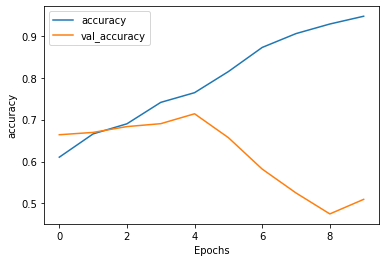

In [27]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import reuters

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

X_train = x_train.values.ravel()
X_test = x_val.values.ravel()
Y_train = y_train.values.ravel()
Y_test = y_val.values.ravel()

x_train_new = sequence.pad_sequences(X_train, maxlen=100)
x_test_new = sequence.pad_sequences(X_test, maxlen=100)
y_train_new = np_utils.to_categorical(Y_train)
y_test_new = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1,100)) 
model.add(LSTM(100, activation='tanh'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, batch_size=512, epochs=10, validation_data=(x_test_new, y_test_new))

print("\n 정확도 : %.4f" % (model.evaluate(x_test_new, y_test_new)[1]))

plot_graphs(history, 'accuracy')

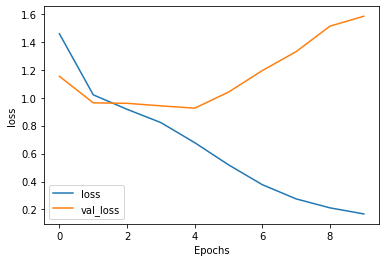

In [28]:
plot_graphs(history, 'loss')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6477 samples, validate on 720 samples
Epoch 1/5
6477/6477 [==============================] - 5s 725us/step - loss: 1.4125 - accuracy: 0.6251 - val_loss: 0.9942 - val_accuracy: 0.6639
Epoch 2/5
6477/6477 [==============================] - 4s 690us/step - loss: 0.9758 - accuracy: 0.6843 - val_loss: 0.9595 - val_accuracy: 0.6847
Epoch 3/5
6477/6477 [==============================] - 5s 706us/step - loss: 0.8785 - accuracy: 0.7178 - val_loss: 0.9478 - val_accuracy: 0.7000
Epoch 4/5
6477/6477 [==============================] - 4s 675us/step - loss: 0.7807 - accuracy: 0.7480 - val_loss: 0.9589 - val_accuracy: 0.6972
Epoch 5/5
720/720 [==============================] - 1s 826us/step

 정확도 : 0.7194


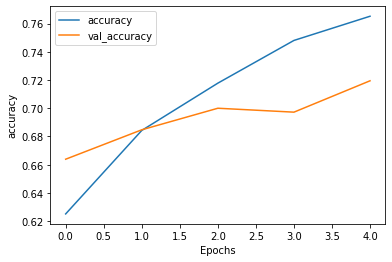

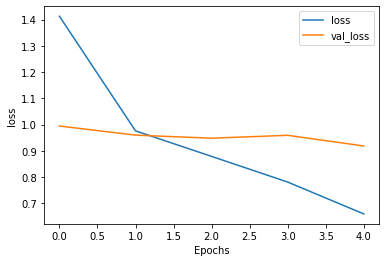

In [29]:
X_train = x_train.values.ravel()
X_test = x_val.values.ravel()
Y_train = y_train.values.ravel()
Y_test = y_val.values.ravel()

x_train_new = sequence.pad_sequences(X_train, maxlen=100)
x_test_new = sequence.pad_sequences(X_test, maxlen=100)
y_train_new = np_utils.to_categorical(Y_train)
y_test_new = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1,100)) 
model.add(LSTM(100, activation='tanh'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, batch_size=512, epochs=5, validation_data=(x_test_new, y_test_new))

print("\n 정확도 : %.4f" % (model.evaluate(x_test_new, y_test_new)[1]))

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')